In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import pickle

http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf

In [21]:
with open(r"M2.2_sauv_fitness.pickle", "rb") as input_file:
    fitness = pickle.load(input_file)

fitness2 = fitness.copy()
    
features = fitness.columns
    
boole = False #Avec ou sans ind. supp  
if boole : 
    # On conserve que les joueurs ayant couru plus d'un km et ayant joué plus d'une mi-temps
    fitness_x = fitness[fitness.dist_km > 7][fitness.time_played > 45]
    fitness_sup = pd.concat([fitness[fitness.dist_km <= 7][fitness.time_played > 45], fitness[fitness.dist_km <= 7][fitness.time_played <= 45]])
else : 
    fitness_x = fitness
    
for k in [0,3,4,7,8]:
    fitness.iloc[:,k] = fitness.iloc[:,k] / fitness.iloc[:,9]
    
# Préparation des données
# Separating out the features
X = fitness_x.loc[:, features].values
if boole:
    X_sup = fitness_sup.loc[:, features].values

# Standardizing the features
sc = StandardScaler()
X = sc.fit_transform(X)

if boole :
    X_sup = sc.fit_transform(X_sup)     
                      
# définition de la commande
pca = PCA(svd_solver='full')

# Estimation, calcul des composantes principales
coord = pca.fit_transform(X)

if boole :
    coordSupp = pca.transform(X_sup)

In [18]:
fitness.describe()

fit_acc_nb  fit_acc_time_med  fit_acc_time_max  fit_acc_dist_km  \
count  126.000000        126.000000        126.000000       126.000000   
mean     1.793013          1.346429          2.803968         0.007787   
std      0.461996          0.055201          0.459287         0.002345   
min      0.315263          1.200000          1.600000         0.000952   
25%      1.589148          1.300000          2.500000         0.006773   
50%      1.830231          1.300000          2.750000         0.007859   
75%      2.067014          1.400000          3.100000         0.009081   
max      2.866030          1.500000          4.100000         0.013717   

       fit_cour_nb  fit_cour_time_med  fit_cour_time_max  fit_cour_dist_km  \
count   126.000000         126.000000         126.000000        126.000000   
mean      0.118065           1.496032           3.153175          0.001850   
std       0.093571           0.722152           1.807349          0.001509   
min       0.000000           0.000000           0.000000          0.000000   
25%       0.055642           1.250000           1.925000          0.000827   
50%       0.104143           1.500000           3.150000          0.001573   
75%       0.163149           1.800000           4.300000          0.002550   
max       0.662252           4.100000           8.100000          0.008460   

       fit_dist_km  fit_time_played  
count   126.000000       126.000000  
mean      0.107406        74.715000  
std       0.018810        29.636107  
min       0.041318         4.686667  
25%       0.100974        55.271667  
50%       0.112276        91.986667  
75%       0.117740        95.492083  
max       0.132627        98.088333

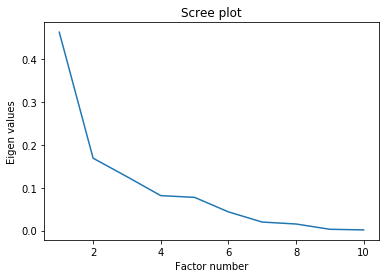

In [32]:
#scree plot
plt.plot(np.arange(1,pca.n_components_+1),pca.explained_variance_ratio_)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

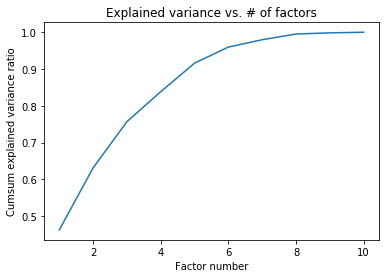

In [33]:
#cumul de variance expliquée
plt.plot(np.arange(1,pca.n_components_+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [22]:
liste_goal = ['_0040', '_0034', '_0013', '_0043', '_0042', '_0011', '_0080']

a = fitness2[fitness2.index == '004_0017']
#for i in range(6):
#    for b in liste_goal:
#        try:
#            a = pd.concat([a,fitness[fitness.index == '00'+str(i)+b]],axis=0)
#        except:
#            pass
a

fit_acc_nb  fit_acc_time_med  fit_acc_time_max  fit_acc_dist_km  \
004_0017       209.0               1.3               3.1         1.035499   

          fit_cour_nb  fit_cour_time_med  fit_cour_time_max  fit_cour_dist_km  \
004_0017         22.0               2.05                3.2          0.357346   

          fit_dist_km  fit_time_played  
004_0017    11.350251        98.088333

In [24]:
fitness2[fitness2.index == '004_0066']

fit_acc_nb  fit_acc_time_med  fit_acc_time_max  fit_acc_dist_km  \
004_0066        12.0               1.3               1.8         0.045289   

          fit_cour_nb  fit_cour_time_med  fit_cour_time_max  fit_cour_dist_km  \
004_0066          0.0                0.0                0.0               0.0   

          fit_dist_km  fit_time_played  
004_0066     0.874946              8.9

Le critère du Scree Test suggère de s'intéresser qu'au 3 premiers axes. Ce qui permet de conservé 80% de l'intertie. 

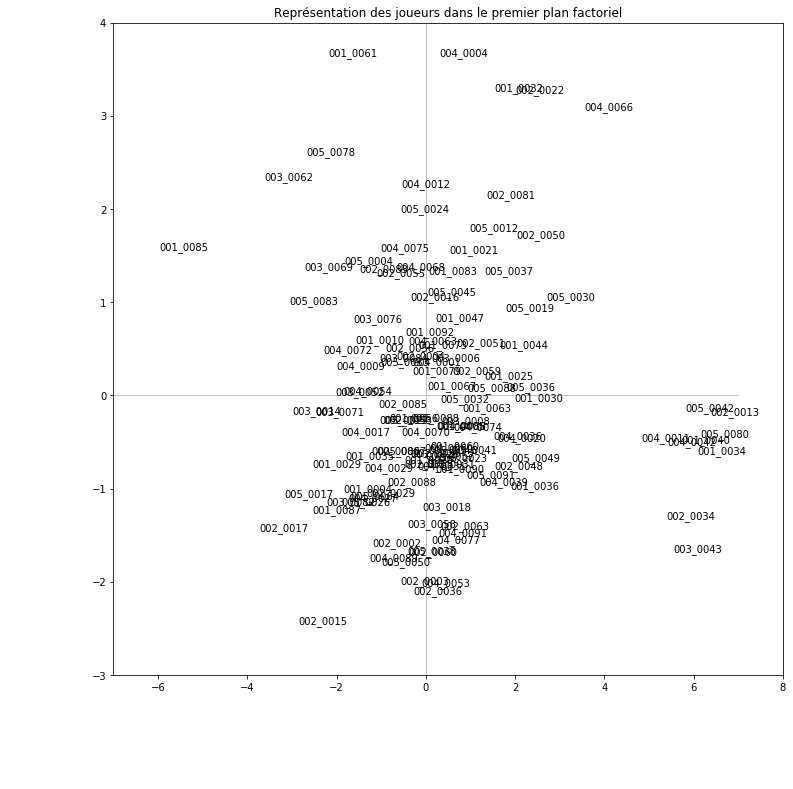

In [48]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-7,8)#même limites en abscisse
axes.set_ylim(-3,4)#et en ordonnée

#placement des étiquettes des observations
n = len(fitness_x)
for i in range(n):
    plt.annotate(fitness_x.index[i],(coord[i,0],coord[i,1]))
    
if boole:
    for i in range(coordSupp.shape[0]):
        plt.annotate(round(fitness_sup.time_played[i]),(coordSupp[i,0],coordSupp[i,1]),color='b')
  
#ajouter les axes
plt.plot([-7,7],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,7],color='silver',linestyle='-',linewidth=1)

#affichage
plt.title("Représentation des joueurs dans le premier plan factoriel")
plt.show()

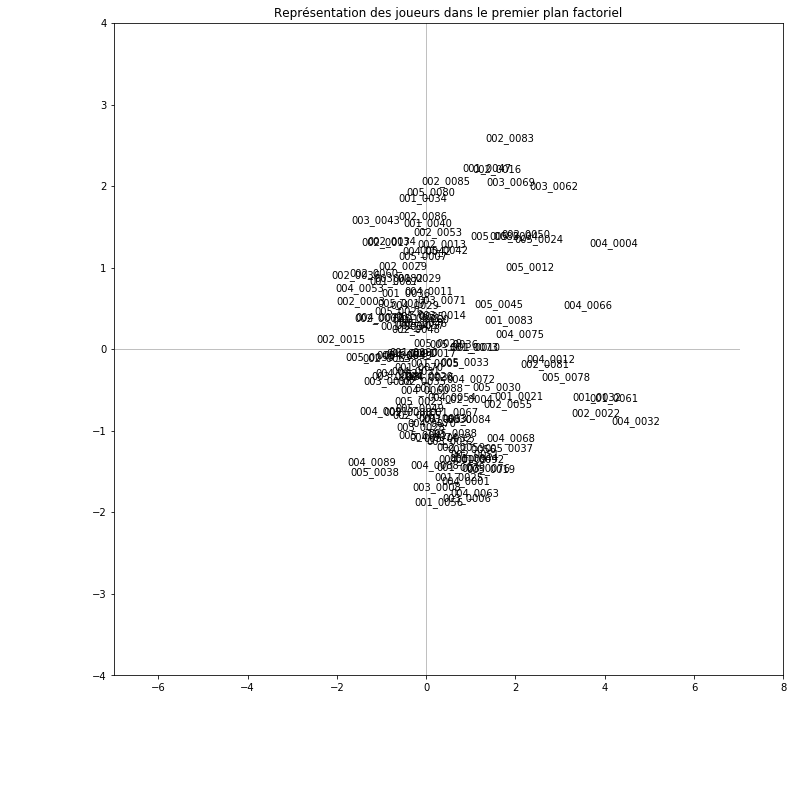

In [42]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-7,8)#même limites en abscisse
axes.set_ylim(-4,4)#et en ordonnée

#placement des étiquettes des observations
n = len(fitness_x)
for i in range(n):
    plt.annotate(fitness_x.index[i],(coord[i,1],coord[i,2]))
if boole:
    for i in range(coordSupp.shape[0]):
        plt.annotate(fitness_sup.index[i],(coordSupp[i,0],coordSupp[i,2]),color='b')
  
#ajouter les axes
plt.plot([-7,7],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,7],color='silver',linestyle='-',linewidth=1)

#affichage
plt.title("Représentation des joueurs dans le premier plan factoriel")
plt.show()

Liste des gardiens :
- Player_0040
- Player_0034
- Player_0013
- Player_0043
- Player_0042
- Player_0011
- Player_0080

On les retrouve en bas à droite sur le plan factoriel. Il conviendrait de refaire l'analyse en les mettant en individus supplémentaire. 

In [36]:
#contribution des individus dans l'inertie totale
di = np.sum(X**2,axis=1)
print(pd.DataFrame({'ID':fitness.index,'d_i':di}))

           ID        d_i
0    001_0088   1.872362
1    001_0029  10.656177
2    001_0056   7.051735
3    001_0004   8.622280
4    001_0035   4.528681
5    001_0034  40.972823
6    001_0032  17.041172
7    001_0030   9.111776
8    001_0063   2.067700
9    001_0083   5.188942
10   001_0060   1.841117
11   001_0036   6.766620
12   001_0070   2.294667
13   001_0085  72.157667
14   001_0021   5.723537
15   001_0067   1.930629
16   001_0040  35.565855
17   001_0087   9.853471
18   001_0073   2.420403
19   001_0047   6.443482
20   001_0079   3.060400
21   001_0010   3.724755
22   001_0044   5.752263
23   001_0025   5.644216
24   001_0005   1.307178
25   001_0092   5.313304
26   001_0061  20.532052
27   001_0090   3.368180
28   002_0088   3.624009
29   002_0029   4.814015
..        ...        ...
96   005_0026   5.914543
97   005_0037   5.237454
98   005_0050   9.098221
99   005_0078  16.109361
100  005_0045   5.157547
101  005_0038  11.273361
102  005_0007   9.215926
103  005_0049   5.439001


In [37]:
#qualité de représentation des individus - COS2
cos2 = coord**2
p = coord.shape[1]
for j in range(p):
    cos2[:,j] = cos2[:,j]/di

print(pd.DataFrame({'id':fitness.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

           id    COS2_1    COS2_2
0    001_0088  0.059681  0.039802
1    001_0029  0.600652  0.054479
2    001_0056  0.094540  0.010307
3    001_0004  0.395727  0.122263
4    001_0035  0.710314  0.102443
5    001_0034  0.904676  0.009359
6    001_0032  0.136772  0.628830
7    001_0030  0.433164  0.000315
8    001_0063  0.329272  0.013228
9    001_0083  0.000863  0.328324
10   001_0060  0.005366  0.176779
11   001_0036  0.535750  0.148733
12   001_0070  0.100328  0.226120
13   001_0085  0.493944  0.033952
14   001_0021  0.047687  0.409445
15   001_0067  0.000647  0.002891
16   001_0040  0.924636  0.007201
17   001_0087  0.657936  0.161181
18   001_0073  0.010705  0.107953
19   001_0047  0.006823  0.100567
20   001_0079  0.030063  0.017991
21   001_0010  0.668720  0.087506
22   001_0044  0.477863  0.045433
23   001_0025  0.302652  0.005581
24   001_0005  0.039838  0.096244
25   001_0092  0.040269  0.080116
26   001_0061  0.233335  0.648500
27   001_0090  0.013776  0.200314
28   002_0088 

In [67]:
#vérifions la théorie -somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [38]:
#contributions aux axes
ctr = coord**2
eigval = (n-1)/n*pca.explained_variance_
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
print(pd.DataFrame({'id':fitness.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

           id     CTR_1         CTR_2
0    001_0088  0.000192  3.504427e-04
1    001_0029  0.010989  2.729947e-03
2    001_0056  0.001145  3.417971e-04
3    001_0004  0.005858  4.957281e-03
4    001_0035  0.005523  2.181634e-03
5    001_0034  0.063636  1.803217e-03
6    001_0032  0.004001  5.039170e-02
7    001_0030  0.006776  1.351435e-05
8    001_0063  0.001169  1.286236e-04
9    001_0083  0.000008  8.011386e-03
10   001_0060  0.000017  1.530523e-03
11   001_0036  0.006224  4.732651e-03
12   001_0070  0.000395  2.439974e-03
13   001_0085  0.061190  1.152055e-02
14   001_0021  0.000469  1.102014e-02
15   001_0067  0.000002  2.624234e-05
16   001_0040  0.056457  1.204270e-03
17   001_0087  0.011130  7.468418e-03
18   001_0073  0.000044  1.228710e-03
19   001_0047  0.000075  3.047227e-03
20   001_0079  0.000158  2.589128e-04
21   001_0010  0.004276  1.532716e-03
22   001_0044  0.004719  1.228956e-03
23   001_0025  0.002933  1.481359e-04
24   001_0005  0.000089  5.916086e-04
25   001_009

In [38]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


[]

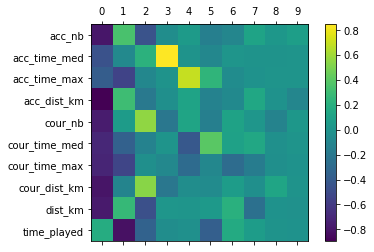

In [39]:

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs    
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corvar, interpolation='nearest')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

a=list(" ")
for b in list(fitness.columns):
    a.append(b)
a

ax.set_yticklabels(a)

fig.colorbar(cax)

plt.plot()

# Plan factoriel 1 et 2

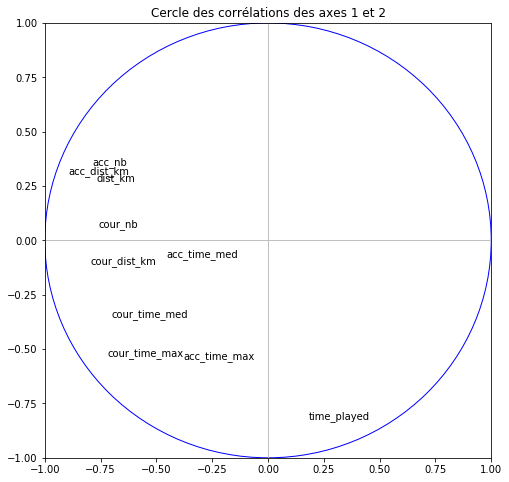

In [49]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes(noms des variables)
for j in range(p):
    plt.annotate(fitness.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.title("Cercle des corrélations des axes 1 et 2")
plt.show()

In [46]:
#cosinus carré des variables
cos2var = corvar**2

#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':fitness.columns[0:10],'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

              id     CTR_1     CTR_2
0         acc_nb  0.090282  0.239872
1   acc_time_med  0.051222  0.023085
2   acc_time_max  0.022540  0.019459
3    acc_dist_km  0.184535  0.106638
4        cour_nb  0.202212  0.027690
5  cour_time_med  0.044374  0.090707
6  cour_time_max  0.141332  0.082689
7   cour_dist_km  0.218673  0.056838
8        dist_km  0.036791  0.281876
9    time_played  0.008039  0.071146


# Plan factoriel 2, 3

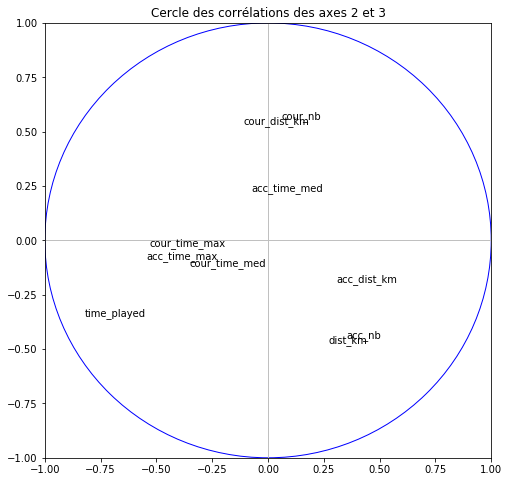

In [50]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes(noms des variables)
for j in range(p):
    plt.annotate(fitness.columns[j],(corvar[j,1],corvar[j,2]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.title("Cercle des corrélations des axes 2 et 3")
plt.show()

In [48]:
#cosinus carré des variables
cos2var = corvar**2

#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':fitness.columns,'CTR_1':ctrvar[:,1],'CTR_2':ctrvar[:,2]}))

              id     CTR_1     CTR_2
0         acc_nb  0.239872  0.044294
1   acc_time_med  0.023085  0.382983
2   acc_time_max  0.019459  0.020045
3    acc_dist_km  0.106638  0.002679
4        cour_nb  0.027690  0.000204
5  cour_time_med  0.090707  0.002555
6  cour_time_max  0.082689  0.055196
7   cour_dist_km  0.056838  0.001237
8        dist_km  0.281876  0.007269
9    time_played  0.071146  0.483537
